# Amazon Sales Project

Welcome to my project on Amazon sales analytics. This dataset includes columns such as product name, category, price, rating, and user reviews and I will them to gain insights into customer behavior, sales trends, and product performance.

The dataset contains key details such as product categories, prices, ratings, and reviews. 

## Project Objectives
This project leverages insights from the Amazon Sales Dataset to uncover actionable strategies that enhance consumer engagement and business performance. The specific objectives are:

1. **Create a Seamless Consumer-Product Connection**
Facilitate an ecosystem where products resonate deeply with consumers, driving satisfaction and strengthening marketplace success.

2. **Analyze Key Drivers of Consumer Behavior**
Explore product categories, pricing strategies, ratings, and sales trends to understand what influences consumer purchasing decisions.

3. **Develop Targeted Communication Plans**
Craft messaging strategies tailored to specific demographics, maximizing consumer engagement and building lasting brand loyalty.

4. **Optimize Product and Marketing Strategies**
Transform data insights into actionable recommendations to enhance product offerings and design effective marketing campaigns.

5. **Align with Consumer Needs**
Provide businesses with the knowledge to adapt to evolving market trends and meet shifting consumer expectations.




## Steps in the Project:
1. **Data Loading and exploration**
Gather a dataset of Amazon product sales from Kaggle and understand the dataset well.

2. **Data Cleaning**
Prepare the data by handling missing values, duplicates, and ensuring it is ready for analysis.

3. **Exploratory Data Analysis (EDA)**
Analyze the data to find insights about product categories, pricing, customer preferences, and seasonal trends.

4. **Data Visualization**
Use visualizations to highlight key findings, such as the distribution of product ratings or sales trends over time.

5. **Insights Summary**
Summarize the key findings from the analysis and provide actionable recommendations for improving sales and customer satisfaction.

This project is focused on understanding how sales performance on Amazon can be optimized using data. By the end, we will have a clear picture of the sales landscape and strategies for improving customer experience and revenue.



## Data Loading and Exploration

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
data = pd.read_csv('amazon.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
print('------------------shape---------------')
print(data.shape)
print('------------------types---------------')
print(data.dtypes)
print('------------------NAN---------------')
print(data.isnull().sum())
print('------------------describe---------------')
print(data.describe().T)
print('------------------head-------------------')
print(data.head(5))
print('------------------info-------------------')
print(data.info())

------------------shape---------------
(1465, 16)
------------------types---------------
product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object
------------------NAN---------------
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
produ

# Data Cleaning

In [8]:
#remove nulls in rating_count column
data.dropna(subset=['rating_count'],inplace=True)
print(data['rating_count'].isnull().sum())

0


In [9]:
#remove columns that we don't need
data = data.drop(["about_product","review_content",'review_title','img_link','product_link','review_id','product_id','user_name','user_id' ],axis = 1)

In [10]:
#change the dtypes of discounted_price, actual_price and discount_percentage
data['discounted_price']= data['discounted_price'].astype(str).str.replace('₹','').str.replace(',','').astype(float)
data['actual_price']= data['actual_price'].astype(str).str.replace('₹','').str.replace(',','').astype(float)
data['discount_percentage']= data['discount_percentage'].astype(str).str.replace('%','').astype(float)/100

In [11]:
#find out the unusual value of rating column
data['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
4.8      3
3.2      2
2.8      2
3.0      2
5.0      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [12]:
#remove the unusual value in rating column and change dtype
data = data.drop(data[data['rating'] == '|'].index, axis=0)
data['rating'] = data['rating'].astype(float) 
data['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      3
4.8      3
3.2      2
5.0      2
2.8      2
2.3      1
2.0      1
2.6      1
2.9      1
Name: count, dtype: int64

In [13]:
#change the dtype of rating_count
data['rating_count'] = data['rating_count'].str.replace(',', '').astype('float64')

In [14]:
#Split the 'category' column by the '|' character
data['main_category'] = data['category'].str.split('|').str[0]
data['sub_category']= data['category'].str.split('|').str[-1]

In [15]:
#Create new column 'rating level'
def categorize_rating(rating):
    if rating < 4.0:
        return 'Bad'
    elif 4.0 <= rating < 4.5:
        return 'Good'
    else:
        return 'Excellent'

data['rating_level'] = data['rating'].apply(categorize_rating)

# Exploratory Data Analysis (EDA) and Visualization

## Does the size of the discount affect product ratings?

In [18]:
correlation = data[['discount_percentage', 'rating']].corr()
print(correlation)

                     discount_percentage    rating
discount_percentage             1.000000 -0.155679
rating                         -0.155679  1.000000


       discount_group    rating
0        Low Discount  4.150680
1     Medium Discount  4.097653
2       High Discount  4.084874
3  Very High Discount  4.015207


/var/folders/td/rm22hmy551b9yb2vch1n872c0000gn/T/ipykernel_48788/2592813030.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_discount = data.groupby('discount_group')['rating'].mean().reset_index()


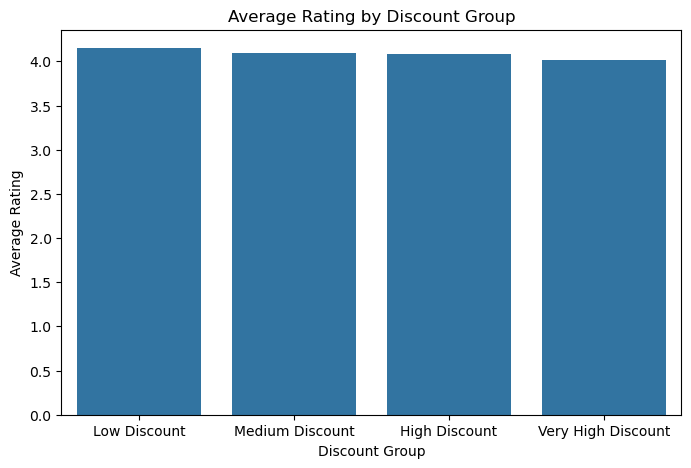

In [19]:
# Create bins for discount percentage
bins = [0, 0.3, 0.5, 0.7, 1.0]  # Define ranges for discount percentages
labels = ['Low Discount', 'Medium Discount', 'High Discount', 'Very High Discount']
data['discount_group'] = pd.cut(data['discount_percentage'], bins=bins, labels=labels)

# Calculate average rating by discount group
avg_rating_by_discount = data.groupby('discount_group')['rating'].mean().reset_index()
print(avg_rating_by_discount)

# Bar plot for average ratings by discount group
plt.figure(figsize=(8, 5))
sns.barplot(x='discount_group', y='rating', data=avg_rating_by_discount)
plt.title('Average Rating by Discount Group')
plt.xlabel('Discount Group')
plt.ylabel('Average Rating')
plt.show()


The correlation analysis between discount_percentage and rating revealed a weak **negative linear relationship**, with a correlation coefficient of approximately -0.156. This suggests that **higher discounts do not strongly influence product ratings**. While there may be a slight tendency for higher discounts to correlate with lower ratings, the relationship is not significant enough to draw definitive conclusions. I recommend conducting A/B tests to identify whether there is a significant difference in product sales between discounted prices and original prices.

## Best-Selling Main Categories

"Which main categories have the highest sales?"

           main_category  Count
0            Electronics    526
1  Computers&Accessories    451
2           Home&Kitchen    447
3         OfficeProducts     31
4     MusicalInstruments      2
5        HomeImprovement      2
6             Toys&Games      1
7          Car&Motorbike      1
8    Health&PersonalCare      1


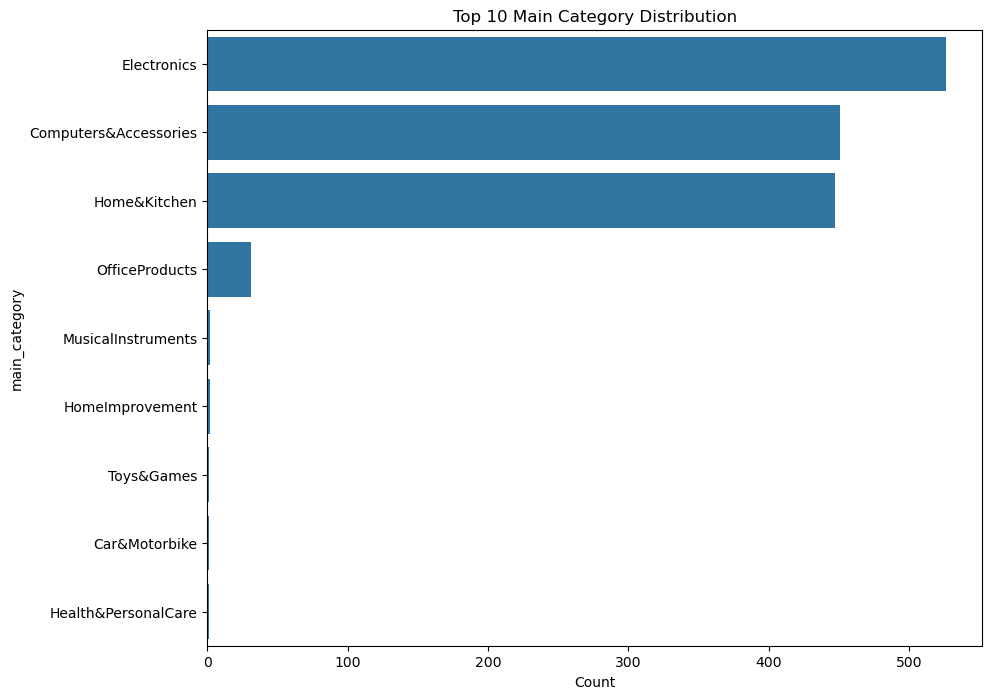

In [22]:
# Get the value counts for the main category
main_category_distribution = data['main_category'].value_counts().head(10)

# Display the result as a DataFrame
main_category_df = main_category_distribution.reset_index(name='Count').rename(columns={'index': 'main_category'})
print(main_category_df)

# Plot the top 10 main categories
plt.figure(figsize=(10, 8))
sns.barplot(data=main_category_df, x='Count', y='main_category')
plt.title('Top 10 Main Category Distribution')
plt.xlabel('Count')
plt.ylabel('main_category')
plt.show()

The best-selling products are from categories such as **Electronics**, **Computers & Accessories**, and **Home & Kitchen**. Here are key recommendations based on the insight:

### 1. Focus Marketing Efforts on Best-Selling Categories

- Allocate more budget to promote Electronics, Computers & Accessories, and Home & Kitchen products through targeted ads and seasonal campaigns.

### 2. Ensure Inventory Availability

- Maintain sufficient stock for high-demand products to avoid losing sales due to stockouts.
  
### 3. Introduce Complementary Products

- Expand the product range by adding accessories or related items within these categories to boost cross-selling opportunities. 

## Best-Selling Sub Categories

"Which sub categories have the highest sales?"

                sub_category  Count
0                  USBCables    231
1               SmartWatches     76
2                Smartphones     68
3           SmartTelevisions     63
4                     In-Ear     52
5             RemoteControls     49
6              MixerGrinders     27
7                 HDMICables     24
8                   DryIrons     24
9                       Mice     24
10       InstantWaterHeaters     23
11               LintShavers     22
12                FanHeaters     20
13           ElectricHeaters     20
14           ElectricKettles     19
15              HandBlenders     19
16       WirelessUSBAdapters     18
17              WallChargers     16
18                  Lapdesks     14
19            LaundryBaskets     13
20                   MicroSD     13
21        Kettle&ToasterSets     13
22                SteamIrons     12
23       JuicerMixerGrinders     12
24    WaterFilters&Purifiers     12
25          ScreenProtectors     12
26       StorageWaterHeaters

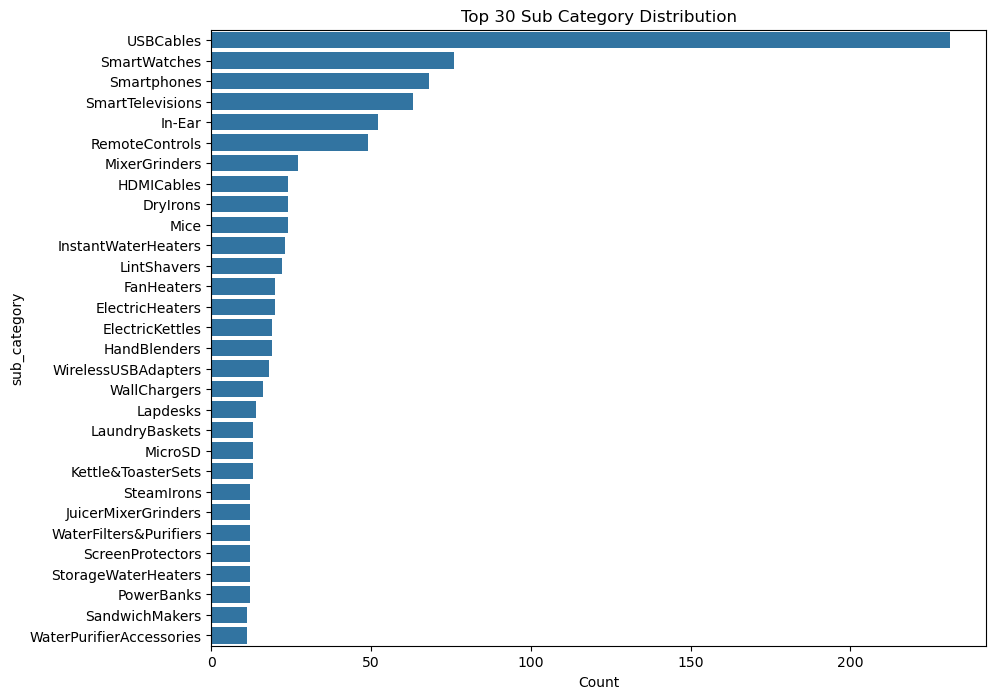

In [25]:
# Get the value counts for the sub category
sub_category_distribution = data['sub_category'].value_counts().head(30)

# Display the result as a DataFrame
sub_category_df = sub_category_distribution.reset_index(name='Count').rename(columns={'index': 'sub_category'})
print(sub_category_df)

# Plot the top 10 main categories
plt.figure(figsize=(10, 8))
sns.barplot(data=sub_category_df, x='Count', y='sub_category')
plt.title('Top 30 Sub Category Distribution')
plt.xlabel('Count')
plt.ylabel('sub_category')
plt.show()

Among the listed subcategories, USBCables has significantly higher sales (231) compared to others. This indicates that USB cables are a highly demanded and frequently purchased product in this category. Here are some recommendations of next steps:

### 1. Capitalize on USB Cable Demand:
- Expand the variety of USB cables (e.g., fast-charging or eco-friendly options) and bundle them with related products like chargers or smartphones to boost cross-selling.

### 2. Promote Underperforming Subcategories:
- Focus marketing efforts on SmartWatches and SmartTelevisions to increase their visibility and sales, reducing reliance on USB cables.

### 3. Analyze and Differentiate Products:
- Gather customer feedback for subcategories with similar sales (e.g., Smartphones and SmartWatches) to identify standout features and emphasize these in promotions.

## Rating Distribution by Main and Sub Category

"How are product ratings distributed across categories?"

In [28]:
rating_distribution_main = data.groupby(['main_category', 'rating_level']).size().reset_index(name='count')

rating_distribution_main['percentage'] = (
    rating_distribution_main.groupby('main_category')['count'].transform(lambda x: x / x.sum() * 100)
)

print(rating_distribution_main)


            main_category rating_level  count  percentage
0           Car&Motorbike          Bad      1  100.000000
1   Computers&Accessories          Bad     74   16.407982
2   Computers&Accessories    Excellent     42    9.312639
3   Computers&Accessories         Good    335   74.279379
4             Electronics          Bad    133   25.285171
5             Electronics    Excellent     24    4.562738
6             Electronics         Good    369   70.152091
7     Health&PersonalCare         Good      1  100.000000
8            Home&Kitchen          Bad    144   32.214765
9            Home&Kitchen    Excellent     29    6.487696
10           Home&Kitchen         Good    274   61.297539
11        HomeImprovement    Excellent      1   50.000000
12        HomeImprovement         Good      1   50.000000
13     MusicalInstruments          Bad      1   50.000000
14     MusicalInstruments         Good      1   50.000000
15         OfficeProducts    Excellent      7   22.580645
16         Off

In [29]:
rating_distribution_sub = data.groupby(['sub_category', 'rating_level']).size().reset_index(name='count')

rating_distribution_sub['percentage'] = (
    rating_distribution_sub.groupby('sub_category')['count'].transform(lambda x: x / x.sum() * 100)
)

print(rating_distribution_sub)


               sub_category rating_level  count  percentage
0                 3DGlasses          Bad      1  100.000000
1    AVReceivers&Amplifiers         Good      1  100.000000
2                  Adapters          Bad      2   66.666667
3                  Adapters         Good      1   33.333333
4    Adapters&Multi-Outlets         Good      1  100.000000
..                      ...          ...    ...         ...
313     WirelessUSBAdapters          Bad      5   27.777778
314     WirelessUSBAdapters    Excellent      1    5.555556
315     WirelessUSBAdapters         Good     12   66.666667
316           WoodenPencils         Good      1  100.000000
317            YogurtMakers         Good      1  100.000000

[318 rows x 4 columns]


/var/folders/td/rm22hmy551b9yb2vch1n872c0000gn/T/ipykernel_48788/3204439972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='main_category', data=data, palette='Set2')


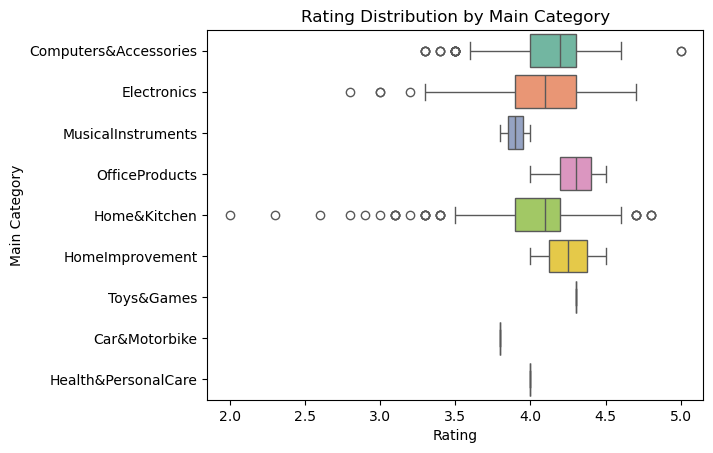

/var/folders/td/rm22hmy551b9yb2vch1n872c0000gn/T/ipykernel_48788/3204439972.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


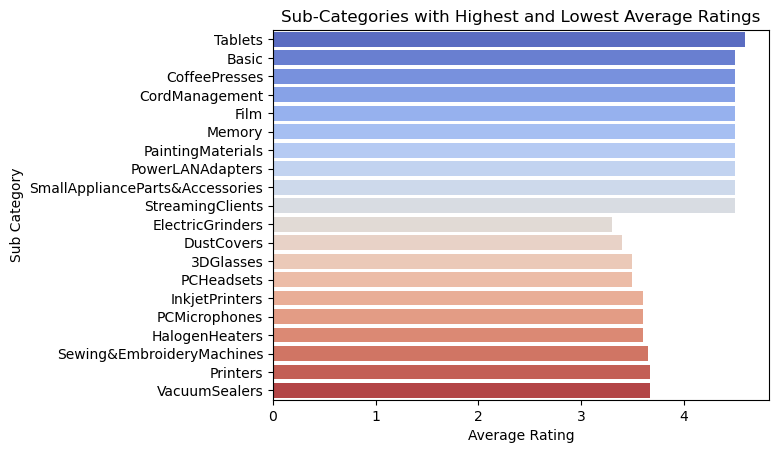

In [30]:
# Box plot for main category
sns.boxplot(x='rating', y='main_category', data=data, palette='Set2')
plt.title('Rating Distribution by Main Category')
plt.xlabel('Rating')
plt.ylabel('Main Category')
plt.show()

#Average Rating
avg_rating_by_sub_category = data.groupby('sub_category')['rating'].mean().reset_index()

# Largest and Lowest rating for sub category
n = 10  
top_rated_sub_categories = avg_rating_by_sub_category.nlargest(n, 'rating')  
lowest_rated_sub_categories = avg_rating_by_sub_category.nsmallest(n, 'rating')  

# Combine
top_and_lowest_rated = pd.concat([top_rated_sub_categories, lowest_rated_sub_categories])

# barplot
sns.barplot(
    x='rating', 
    y='sub_category', 
    data=top_and_lowest_rated, 
    palette='coolwarm'
)
plt.title('Sub-Categories with Highest and Lowest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Sub Category')
plt.show()


### Main Category
The **Home&Kitchen** category shows a higher number of outliers in the rating distribution, which may indicate:

- Significant quality variations among products in this category, leading to a wider range of ratings (e.g., some products receive very low or very high ratings).
- Customer expectations for products in this category may vary, resulting in greater rating volatility.
- Specific products might have design flaws, usability issues, or functional problems that caused extremely low ratings.
  
These outliers could highlight products requiring improvement. It is recommended to further analyze the specific main-categories or products associated with these outliers to identify the reasons for poor ratings.

### Sub Category

**Average Rating by Sub Category:**

The bar plot of sub-categories with the highest and lowest average ratings highlights:
Sub-categories with the highest average ratings: These likely represent products with consistent quality and positive user experiences.
Sub-categories with the lowest average ratings: These might contain products with design flaws, usability issues, or unmet customer expectations.

**Next Steps:**

For the sub-categories with the lowest ratings, identify specific products with repeated low scores and analyze customer reviews to pinpoint common complaints.
Enhance product quality or address recurring issues in these sub-categories to improve overall ratings.








## Rating and Rating Count Visualization

/var/folders/td/rm22hmy551b9yb2vch1n872c0000gn/T/ipykernel_48788/3947641560.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='rating', weights='rating_count', bins=10, kde=True ,palette='viridis')


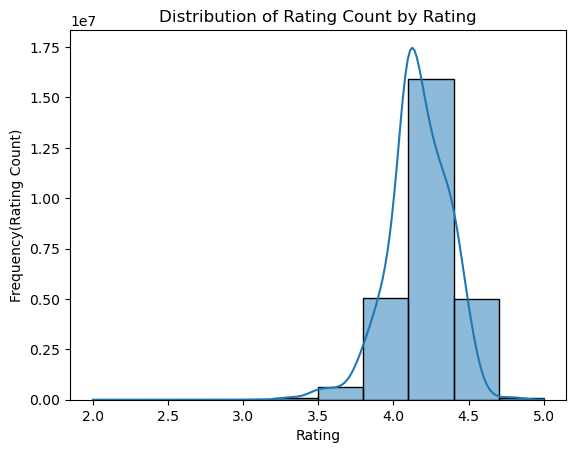

In [33]:
sns.histplot(data=data, x='rating', weights='rating_count', bins=10, kde=True ,palette='viridis')
plt.title('Distribution of Rating Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency(Rating Count)')
plt.show()

## How does the average discount percentage vary across categories?

/var/folders/td/rm22hmy551b9yb2vch1n872c0000gn/T/ipykernel_48788/3834241633.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


           main_category  avg_discount
5        HomeImprovement      0.575000
1  Computers&Accessories      0.539202
3    Health&PersonalCare      0.530000
2            Electronics      0.508289
6     MusicalInstruments      0.460000
0          Car&Motorbike      0.420000
4           Home&Kitchen      0.401745
7         OfficeProducts      0.123548
8             Toys&Games      0.000000


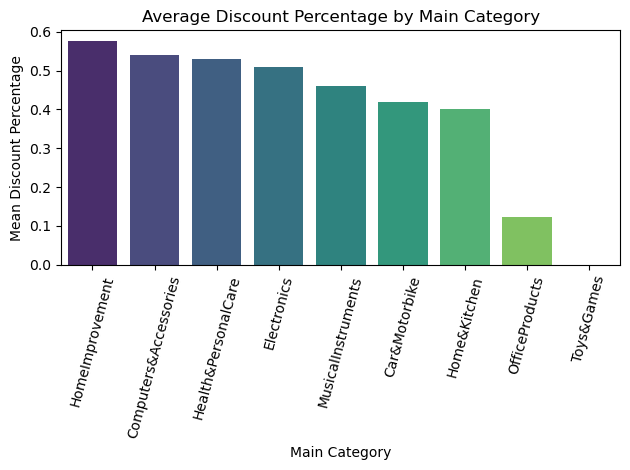

In [35]:
main_category_analysis = data.groupby('main_category').agg(
    avg_discount=('discount_percentage', 'mean')
).reset_index()

main_category_analysis = main_category_analysis.sort_values(by='avg_discount', ascending=False)

print(main_category_analysis)

sns.barplot(
    data=main_category_analysis,
    x='main_category',
    y='avg_discount',
    palette='viridis'
)
plt.title('Average Discount Percentage by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Mean Discount Percentage')
plt.xticks(rotation=75,ha='center')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to fit elements nicely
plt.show()

             sub_category  avg_discount
2                Adapters      0.803333
9              BasicCases      0.707500
6      AutomobileChargers      0.580000
3  Adapters&Multi-Outlets      0.570000
7      BackgroundSupports      0.460000
4               AirFryers      0.440000
5   AirPurifiers&Ionizers      0.420000
1  AVReceivers&Amplifiers      0.360000
0               3DGlasses      0.230000
8                   Basic      0.000000


/var/folders/td/rm22hmy551b9yb2vch1n872c0000gn/T/ipykernel_48788/1479696465.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


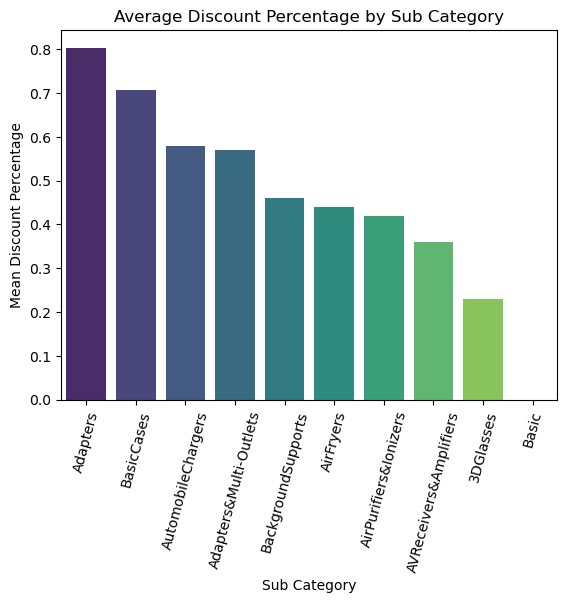

In [36]:
sub_category_analysis = data.groupby('sub_category').agg(
    avg_discount=('discount_percentage', 'mean')
).reset_index().head(10)

sub_category_analysis = sub_category_analysis.sort_values(by='avg_discount', ascending=False)

print(sub_category_analysis)

sns.barplot(
    data=sub_category_analysis,
    x='sub_category',
    y='avg_discount',
    palette='viridis'
)
plt.title('Average Discount Percentage by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Mean Discount Percentage')
plt.xticks(rotation=75, ha='center') 
plt.show()

- **Potential Over-discounting:**

Some categories with extreme discounts but low sales (e.g., PhoneCharms, EarPads) may reflect excess inventory or low consumer interest, warranting a review of promotional strategies.

- **High Discounts Don't Guarantee High Sales:**

Categories like PhoneCharms and EarPads offer the highest discounts (90%) but have very low sales (total_sub_sales of 305 and 594, respectively). This suggests that high discounts alone cannot drive demand for low-interest products.


## Relationship Between Product Sales and Ratings
Is there a positive relationship between product ratings and sales?

           main_category  avg_rating  sales
2            Electronics    4.081749    526
1  Computers&Accessories    4.155654    451
4           Home&Kitchen    4.040716    447
7         OfficeProducts    4.309677     31
5        HomeImprovement    4.250000      2
6     MusicalInstruments    3.900000      2
0          Car&Motorbike    3.800000      1
3    Health&PersonalCare    4.000000      1
8             Toys&Games    4.300000      1
correlation_coeff: 0.015839121172530522, p_value: 0.967739552483465


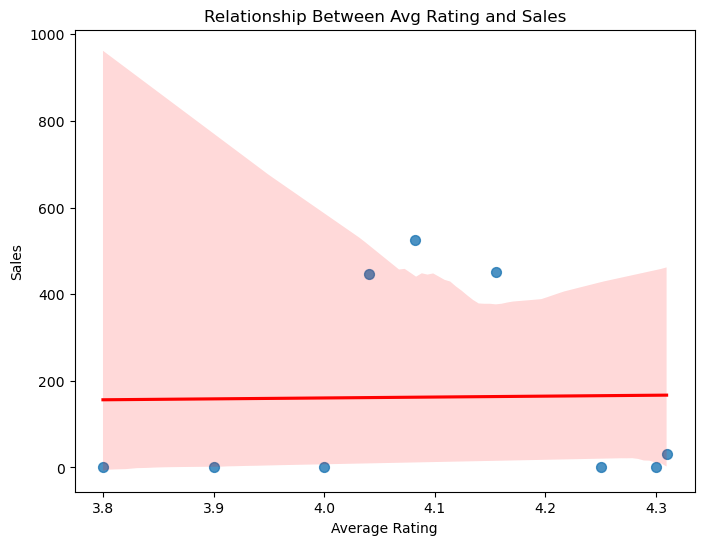

In [39]:
Main_dis = data.groupby('main_category').agg(
    avg_rating=('rating', 'mean'),
    sales=('main_category', 'size')  # Count occurrences of each main_category
).reset_index().sort_values(by='sales', ascending=False)

print(Main_dis)



from scipy.stats import pearsonr

correlation_coeff, p_value = pearsonr(Main_dis['avg_rating'], Main_dis['sales'])

print(f"correlation_coeff: {correlation_coeff}, p_value: {p_value}")



# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=Main_dis, x='avg_rating', y='sales', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Relationship Between Avg Rating and Sales')
plt.xlabel('Average Rating')
plt.ylabel('Sales')
plt.show()


              sub_category  avg_sub_rating  sub_sales
189              USBCables        4.153247        231
162           SmartWatches        4.025000         76
163            Smartphones        4.100000         68
161       SmartTelevisions        4.209524         63
80                  In-Ear        3.898077         52
..                     ...             ...        ...
83   InkjetInkRefills&Kits        4.300000          1
74         HandlebarMounts        4.300000          1
72            HandheldBags        4.300000          1
60            FountainPens        4.100000          1
206           YogurtMakers        4.100000          1

[207 rows x 3 columns]
correlation_coeff: -0.050549378749451625, p_value: 0.46947257194810915


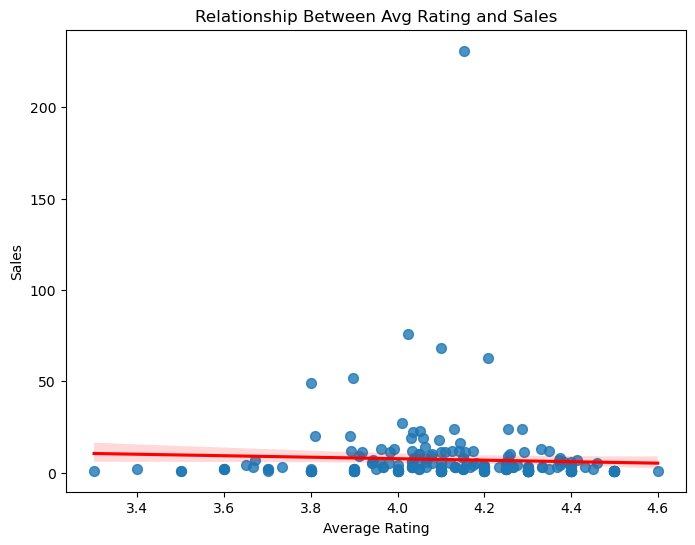

In [40]:
Sub_dis = data.groupby('sub_category').agg(
    avg_sub_rating=('rating', 'mean'),
    sub_sales=('sub_category', 'size')  # Count occurrences of each main_category
).reset_index().sort_values(by='sub_sales', ascending=False)

print(Sub_dis)

correlation_coeff, p_value = pearsonr(Sub_dis['avg_sub_rating'], Sub_dis['sub_sales'])

print(f"correlation_coeff: {correlation_coeff}, p_value: {p_value}")



# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=Sub_dis, x='avg_sub_rating', y='sub_sales', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Relationship Between Avg Rating and Sales')
plt.xlabel('Average Rating')
plt.ylabel('Sales')
plt.show()


The analysis reveals that there is no significant correlation between sales and ratings in both main categories (correlation coefficient: 0.0158, p-value: 0.9677) and subcategories (correlation coefficient: -0.0505, p-value: 0.4695). This indicates that product ratings do not have a meaningful impact on sales, suggesting other factors may play a larger role in driving sales.